In [1]:
import pandas as pd

In [20]:
df = pd.read_csv('/Users/jake/Downloads/ExchangeBets_Settled(10).csv')

In [21]:
df.head()

,Settled,Description,Type,Odds,Stake (AUD),Liability (AUD),Profit/Loss (AUD),Status
0,15-Jan-20 16:08:22,16:05 Warwick Farm 3. Come Along-Win | Betfair...,Back,3.55,0.03,--,-0.03,Lost
1,15-Jan-20 16:08:22,16:05 Warwick Farm 3. Come Along-Win | Betfair...,Back,3.40,0.03,--,-0.03,Lost
2,15-Jan-20 16:08:22,16:05 Warwick Farm 3. Come Along-Win | Betfair...,Back,3.25,0.03,--,-0.03,Lost
3,15-Jan-20 16:08:22,16:05 Warwick Farm 3. Come Along-Win | Betfair...,Back,3.35,0.03,--,-0.03,Lost
4,15-Jan-20 16:08:22,16:05 Warwick Farm 3. Come Along-Win | Betfair...,Back,3.25,0.03,--,-0.03,Lost


In [22]:
df.dropna(inplace=True)

In [23]:
df.Description = df.Description.apply(lambda x: x[:20])

In [24]:
df['valid'] = (df.Type=='Lay')&(df.Odds.str.contains('(BSP)'))

/Users/jake/miniconda3/envs/betfair/lib/python3.6/site-packages/pandas/core/strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [25]:
# df = df[df.Settled.str.contains('13-Jan-20')]

In [26]:
df.Odds = df.Odds.str.strip(' (BSP)')
df.Odds = df.Odds.astype('float')

In [27]:
temp_df = df[['Description', 'valid', 'Settled']].groupby('Description').max()
# temp_df['n'] = list(range(len(temp_df)))

In [28]:
df = df.groupby(['Description', 'Type']).agg({'Odds':'mean', 'Stake (AUD)':'sum', 'valid':'max'}).reset_index()

In [29]:
df = df.pivot(index='Description', columns='Type', values=['Odds', 'Stake (AUD)'])

In [30]:
df.columns = [x+y for x, y in df.columns]

In [31]:
df = df.join(temp_df)

In [32]:
df['n_bets'] =  df['Stake (AUD)Back'] / 0.03

In [33]:
df['potential'] = df.OddsBack - 1
df['liability_sz'] = (df.potential / (df.OddsLay-1)) - 1

df['profit_ev'] = df.liability_sz * (1 - 1/df.OddsLay)
df['profit_ev'] = df[['profit_ev', 'liability_sz']].min(axis=1)
df.profit_ev *= df.n_bets

In [34]:
df = df[df.valid==True]

In [35]:
df.profit_ev.sum()

0.7392255735085027

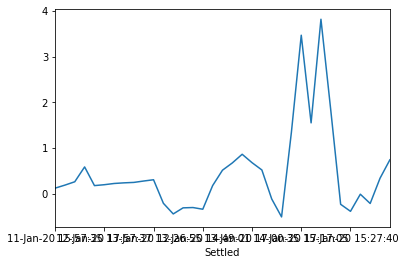

In [36]:
df.set_index('Settled').sort_index().profit_ev.cumsum().plot()

/Users/jake/miniconda3/envs/betfair/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


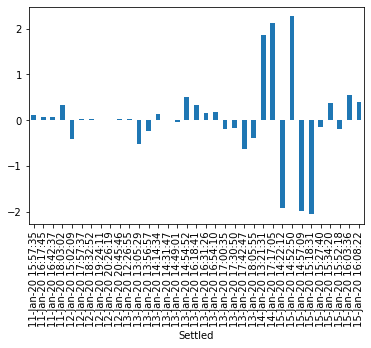

In [37]:
df.set_index('Settled').sort_index().profit_ev.plot('bar')

In [38]:
df.profit_ev.mean()

0.021120730671671507

In [39]:
df.profit_ev.sum()

0.7392255735085027